## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Shareability potential

In [1]:
import os
import pandas as pd
%load_ext autoreload
%autoreload 2
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __make the config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

In [5]:
params.gammdist.shape = 2
params.gammdist.scale = 500
params.gamma_imp.shape = 1.15
params.gamma_imp.scale = 3200
params.nP = 100
params.nCenters = 3
params.city = 'Amsterdam, Netherlands'
params.t0 = '17:00'
params = ExMAS.utils.make_paths(params)
ExMAS.utils.save_config(params, path = 'ExMAS/data/configs/potential.json')

In [6]:
params.t0 = pd.to_datetime(params.t0)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [8]:
inData = ExMAS.utils.synthetic_demand_poly_II(inData, params)

4. __save requests__ 

In [18]:
inData.requests.to_csv('poly_demand.csv')

5. __load requests__ 

In [19]:
inData.requests = pd.read_csv('poly_demand.csv', index_col = 0)
inData.requests.treq = pd.to_datetime(inData.requests.treq)
inData.requests['pax_id'] = inData.requests.index.copy()
inData.requests.tarr = pd.to_datetime(inData.requests.tarr)
inData.requests.ttrav = pd.to_timedelta(inData.requests.ttrav)

5. __visualize demand__ 

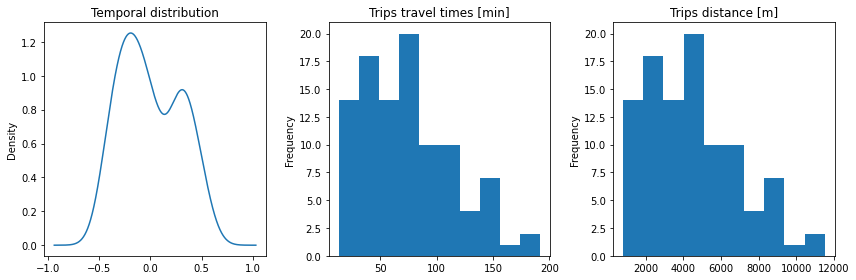

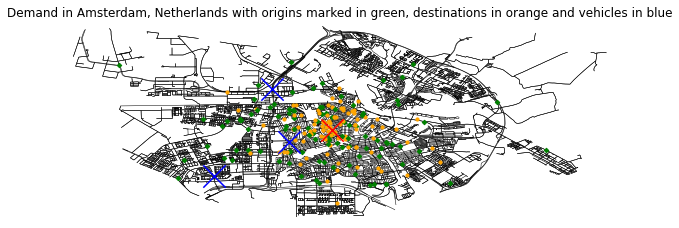

In [13]:
ExMAS.utils.plot_demand_poly(inData, params)

### run

22-08-20 13:38:31-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
22-08-20 13:38:31-INFO-creating combinations
22-08-20 13:38:31-INFO-9900	 nR*(nR-1)
22-08-20 13:38:31-INFO-3648	departure compatibility
22-08-20 13:38:31-INFO-1616	origins shareability
22-08-20 13:38:31-INFO-376	utility for i
22-08-20 13:38:31-INFO-108	utility for j
22-08-20 13:38:31-INFO-107	LIFO pairs
22-08-20 13:38:31-INFO-Reduction of feasible pairs by 98.92%


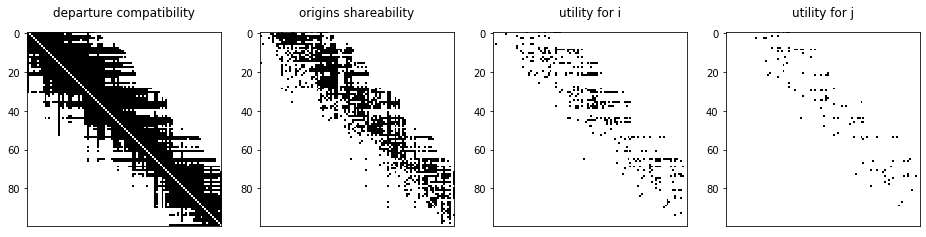

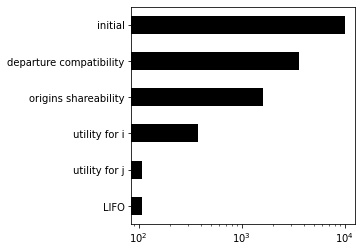

22-08-20 13:38:32-INFO-Degree 2 	Completed
22-08-20 13:38:32-INFO-trips to extend at degree 2 : 215
22-08-20 13:38:32-INFO-At degree 2 feasible extensions found out of 13 searched
22-08-20 13:38:32-INFO-Degree 3 	Completed
22-08-20 13:38:32-INFO-trips to extend at degree 3 : 13
22-08-20 13:38:32-INFO-At degree 3 feasible extensions found out of 1 searched
22-08-20 13:38:32-INFO-Degree 4 	Completed
22-08-20 13:38:32-INFO-trips to extend at degree 4 : 1
22-08-20 13:38:32-INFO-At degree 4 feasible extensions found out of 0 searched
22-08-20 13:38:32-INFO-Degree 5 	Completed
22-08-20 13:38:32-INFO-No more trips to exted at degree 5
22-08-20 13:38:32-INFO-Matching 100 trips to 329 rides in order to minimize u_veh


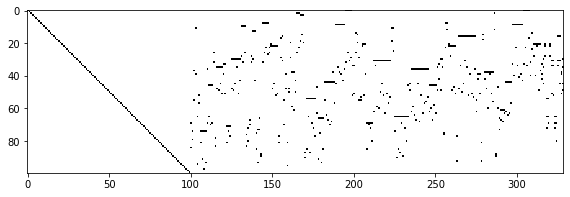

22-08-20 13:38:32-INFO-Problem solution: Optimal. 
Total costs for single trips:         51,605 
reduced by matching to:               43,540
22-08-20 13:38:32-INFO-Calculations  completed
22-08-20 13:38:32-INFO-DotMap(VehHourTrav=43180, VehHourTrav_ns=51605, PassHourTrav=56366, PassHourTrav_ns=51605, PassUtility=764.5699500000002, PassUtility_ns=800.446, mean_lambda=0.2279600893185223, revenue_s=54185.25, revenue_ns=77407.5, Fare_Discount=-0.3, nR=100, SINGLE=42, PAIRS=24, TRIPLES=2, QUADRIPLES=1, QUINTETS=0, PLUS5=0, shared_ratio=0.5800000000000001, fleet_size_nonshared=21.0, fleet_size_shared=16.0, lambda_shared=0.2279600893185223)


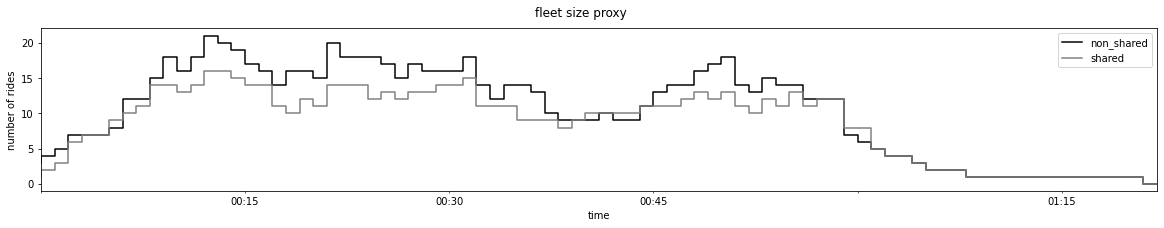

In [20]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [15]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,44928,total travel time of vehicles (with travellers...
VehHourTrav_ns,56186,as above yet in non-shared scenarion
PassHourTrav,63758,total travel time of passengers
PassHourTrav_ns,56186,as above yet in non-shared scenarion
PassUtility,831.743,total (dis)utility of passengers
PassUtility_ns,871.437,as above yet in non-shared scenarion
mean_lambda,0.260833,mean vehicle cost reduction (lambda) over shar...
revenue_s,58995.3,total fares paid by travellers sharing
revenue_ns,84279,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

---
(c) Rafał Kucharski, Delft, 2020